Brianna Solano Aguilar

Excersise 2

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
m = 1000
n = 4
iterations = 1000

In [73]:
#Part a
mu, sigma = 0, 1
X = np.random.normal(mu, sigma, size = (1000,4))
print(X.shape)

(1000, 4)


In [74]:
#Part b
#Data without noise
Y = np.empty((1000,1))
theta = np.array([[1,-1, 2,-5 ]])
thetaTrans = np.transpose(theta)
print("Theta transpose = \n", thetaTrans)
#mapping -1 to 0 
for i in range(m):
  x = (theta.dot(X[i])) + 0.5
  if (x >= 0):
    Y[i] = 1
  else:
    Y[i] = 0

Theta transpose = 
 [[ 1]
 [-1]
 [ 2]
 [-5]]


In [75]:
#Data with noise
mu, sigma = 0, 2
Z = np.random.normal(mu, sigma, size = (1000,1))
Ynoise = np.zeros(1000)
print("Theta transpose = \n", thetaTrans)
for i in range(m):
  x = (theta.dot(X[i])) + 0.5 + Z[i]
  #mapping -1 to 0
  if (x >= 0):
    Ynoise[i] = 1
  else:
    Ynoise[i] = 0

Theta transpose = 
 [[ 1]
 [-1]
 [ 2]
 [-5]]


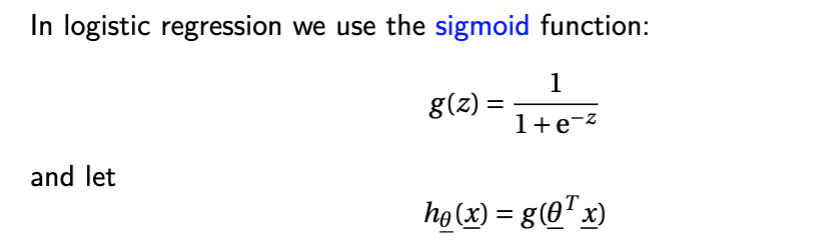

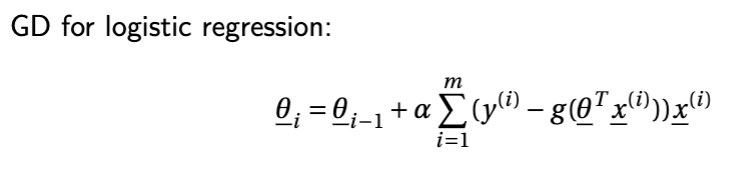

In [76]:
#collumn of 1s
ones = np.ones((1000, 1))
X = np.concatenate((ones, X), axis=1)
print(X)

[[ 1.          0.00728937  1.09919349  1.76227283 -0.85855553]
 [ 1.         -0.63457017 -0.21373284 -0.26860329 -0.20674299]
 [ 1.         -0.16905713 -0.70323231 -1.03606684 -1.07683588]
 ...
 [ 1.         -0.04103724 -0.55417087  0.1044289   0.18371932]
 [ 1.          0.11606183 -0.19035101  0.91182027 -1.27072332]
 [ 1.         -1.39389721 -0.37873964  0.22527284 -0.26365099]]


In [77]:
#Part c
learningrate = 0.1/m
predicttheta = np.array([0,0,0,0,0])

def sigmoid(predictedtheta,X):
    z=X.dot(predicttheta.T)
    z = 1/(1+np.exp(-z)) 
    return z 
    

for i in range(iterations):
  sum = 0
  for j in range(m):
    g = sigmoid(predicttheta,X[j])
    sum = sum + (Y[j] - g)*X[j]
  predicttheta = predicttheta + learningrate * sum



print("Final Coefficients = ", predicttheta)

Final Coefficients =  [ 0.35052718  0.8915621  -0.97897894  1.85940531 -4.7702624 ]


Compare your result with the parameters used for generating the data in part (b).
----------------------------------------------------------
When comparing the paramters to the coefficients found using logistic regrssion, you can notice that there is only slgiht difference between the two. 

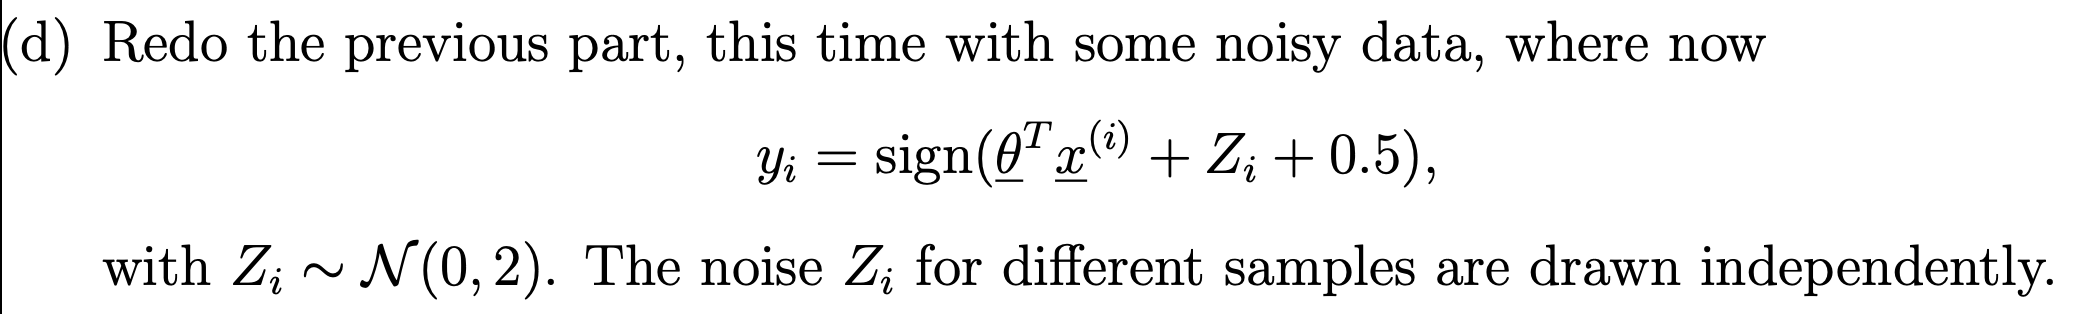

In [78]:
#part d 
predictthetanoise = np.array([[0,0, 0,0,0]])

#Estimate logistic regression coefficients using gradient descent

def sigmoid(predictthetanoise,X):
    z=X.dot(predictthetanoise.T)
    z = 1/(1+np.exp(-z)) 
    return z 
    

for i in range(iterations):
  sum = 0
  for j in range(m):
    g = sigmoid(predictthetanoise,X[j])
    sum = sum + (Ynoise[j] - g)*X[j]
  predictthetanoise = predictthetanoise + learningrate * sum



print("Final Coefficients = ", predictthetanoise)

Final Coefficients =  [[ 0.32436721  0.63117827 -0.75597965  1.5172172  -3.72263903]]


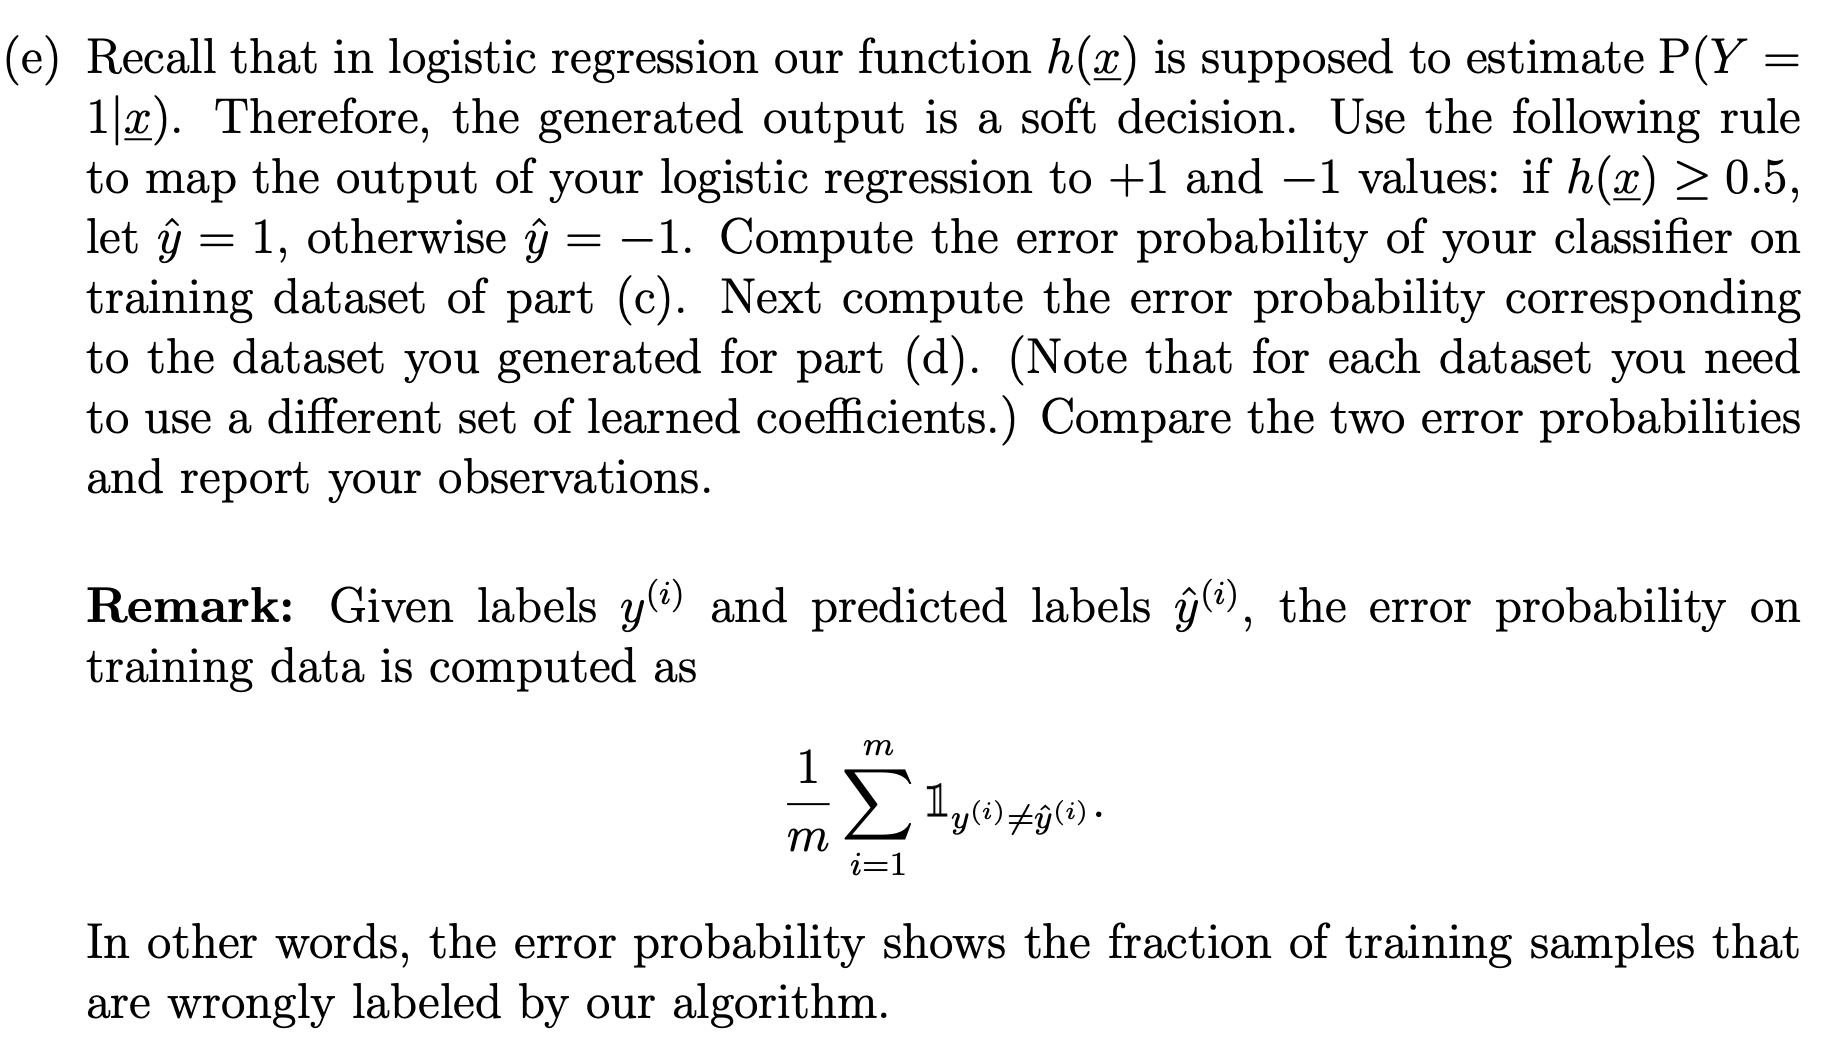

In [79]:
#part e
#Error Porbability of Data without noise
Ynew = np.empty((1000,1))
Ynewnoise = np.empty((1000,1))
for i in range(len(Y)):
  p = predicttheta.dot(X[i])
  p = 1/(1+np.exp(-p))
  if ( p >= 0.5):
    Ynew[i] = 1
  else:
    Ynew[i] = 0
count = 0
for i in range(len(Y)):
  if(Y[i] != Ynew[i]):
    count = count + 1
error = count/m
print("error (no noise) = ", error)
print("error percent (no noise) = ", error * 100, "%")
for i in range(len(Y)):
  p = predictthetanoise.dot(X[i])
  p = 1/(1+np.exp(-p))
  if ( p >= 0.5):
    Ynewnoise[i] = 1
  else:
    Ynewnoise[i] = 0
count = 0
for i in range(len(Y)):
  if(Ynoise[i] != Ynewnoise[i]):
    count = count + 1
error = count/m
print("error (no noise) = ", error)
print("error percent (no noise) = ", error * 100, "%")

error (no noise) =  0.008
error percent (no noise) =  0.8 %
error (no noise) =  0.097
error percent (no noise) =  9.700000000000001 %


 Compare the two error probabilities and report your observations.
 ----------------------------------------------------
 The error rate of the data without noise is shown to be smaller when compared to the error rate of the data with noise. This is to be expected since the data with the noise has a variable factor that provides an uncertainty. Due to this it's harder to make a prediction of the data provided. 


Question 2

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
#Part a
modelnoNoise = LogisticRegression().fit(X,Y)
modelNoise = LogisticRegression().fit(X,Ynoise)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
#Part b 
modelnoNoise.predict(X)
modelNoise.predict(X)
print("Model score of data with no noise", modelnoNoise.score(X,Y))
print("Model score of data with noise", modelNoise.score(X,Ynoise))
print("Model score of data with no noise", modelnoNoise.score(X,Y) * 100, "% accuracy")
print("Model score of data with noise", modelNoise.score(X,Ynoise) * 100, "% accuracy")

Model score of data with no noise 0.995
Model score of data with noise 0.903
Model score of data with no noise 99.5 % accuracy
Model score of data with noise 90.3 % accuracy


Comparison
------------------------------------------------------------------------
As in the first quesiton, the model without noise has a 9.8 percent more accuracy then when compared to the model with noise. This could be due to the noise adding an uncertainty when making a prediction. 

Question 3

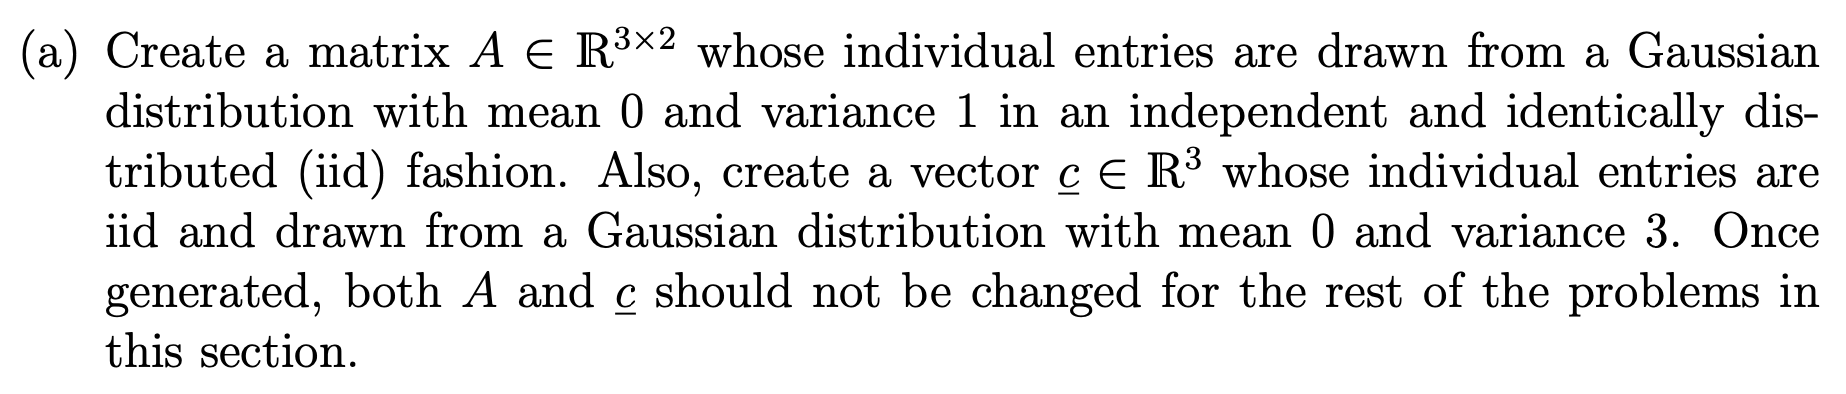

In [83]:
#part a
A = np.random.normal(0, 1, size = (3,2))
print(A.shape)
c = np.random.normal(0, 3, size = (3))
print(c.shape)

(3, 2)
(3,)


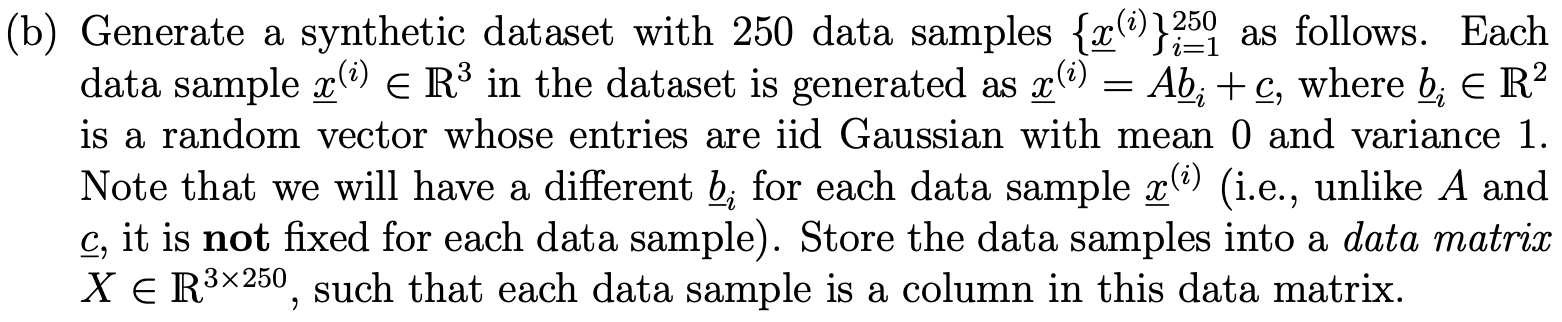

In [84]:
#part b
X = np.empty((250,3))
b = np.random.normal(0, 1, size = (250,2))
for i in range (250):
  X[i] = A.dot(b[i])+c
X = np.transpose(X)

In [85]:
#part c
rank = np.linalg.matrix_rank(X)
print("Matrix X has a rank of" , rank)

Matrix X has a rank of 3


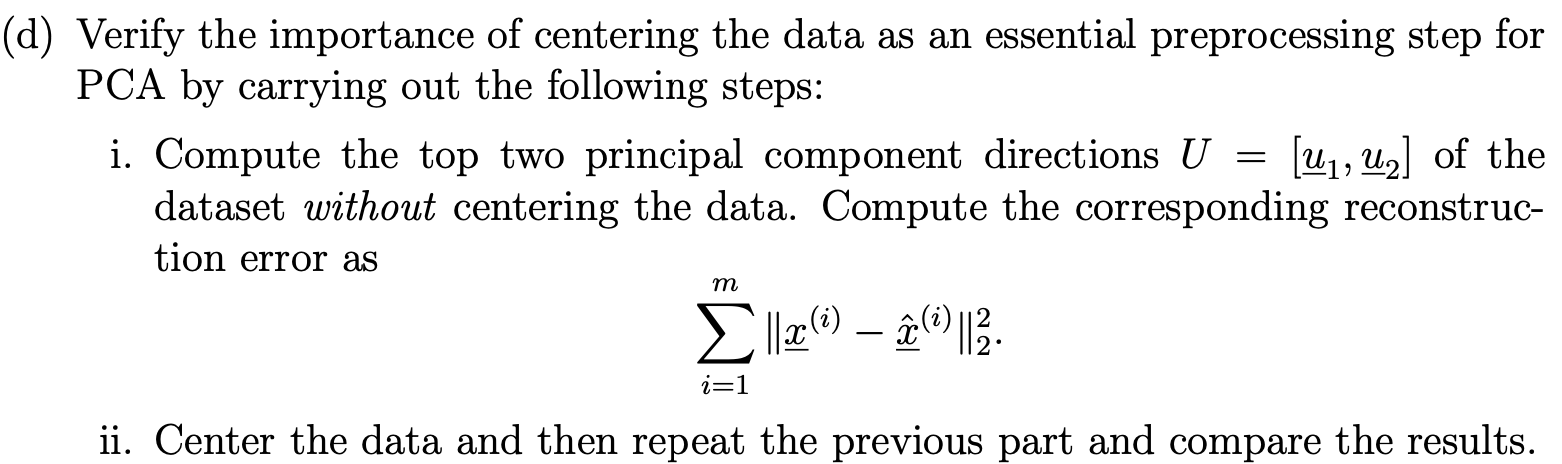

In [86]:
#part d
#i
w,v=np.linalg.eig(X.dot(X.T))
print('E-value:', w)
print('E-vector', v)
u2 = np.partition(w.flatten(), -2)[-2]
u2index, = np.where(w == u2)
print("Index of 2nd highest eigen value", u2index)
u1 = np.partition(w.flatten(), -2)[-1]
u1index, = np.where(w == u1)
print("Index of 1st highest eigen value", u1index)
U = v[u1index].T
d = v[u2index].T
U = np.concatenate((U, d), axis=1)
print("U = " , U)
#Corresponding reconstruction error
sum = 0
for i in range(250):
  Xhat = np.dot(U,U.T)
  Xhat = np.dot(Xhat,X[:,i])
  dif = X[:,i] - Xhat
  sum = sum + np.dot(dif.T,dif)
print("Reconstruction Error without cenetering data",sum)

E-value: [1654.37702607  489.04667372  184.52437143]
E-vector [[-0.73651541  0.59642918 -0.3190882 ]
 [ 0.3670284   0.74862439  0.55213375]
 [-0.56818589 -0.28954058  0.77027985]]
Index of 2nd highest eigen value [1]
Index of 1st highest eigen value [0]
U =  [[-0.73651541  0.3670284 ]
 [ 0.59642918  0.74862439]
 [-0.3190882   0.55213375]]
Reconstruction Error without cenetering data 392.29667688968533


In [87]:
#Part d 
#ii
#Center data
row_means = X.mean(axis=1)
print(row_means)
for i in range(3):
  for j in range(250):
    X[i,j] = X[i,j]/row_means[i] 
#Two principla componenet directions
w,v=np.linalg.eig(X.dot(X.T))
print('E-value:', w)
print('E-vector', v)
u2 = np.partition(w.flatten(), -2)[-2]
u2index, = np.where(w == u2)
print("Index of 2nd highest eigen value", u2index)
u1 = np.partition(w.flatten(), -2)[-1]
u1index, = np.where(w == u1)
print("Index of 1st highest eigen value", u1index)
U = v[u1index].T
d = v[u2index].T
U = np.concatenate((U, d), axis=1)
print("U = ", U)
#Corresponding reconstruction error
sum = 0
for i in range(250):
  Xhat = np.dot(U,U.T)
  Xhat = np.dot(Xhat,X[:,i])
  dif = X[:,i] - Xhat
  sum = sum + np.dot(dif.T,dif)
print("Reconstruction Error with centered data", sum)

[ 0.29641217 -1.34893853  1.1780971 ]
E-value: [12659.37025137   419.2379156    126.77316488]
E-vector [[-0.98971667 -0.13316261 -0.05223638]
 [-0.05486795  0.69066564 -0.72108979]
 [-0.13210007  0.71080848  0.69086966]]
Index of 2nd highest eigen value [1]
Index of 1st highest eigen value [0]
U =  [[-0.98971667 -0.05486795]
 [-0.13316261  0.69066564]
 [-0.05223638 -0.72108979]]
Reconstruction Error with centered data 419.0055514448499


Compare results
---------------------------------------------------------------------
When centering the data, you can see that the sumation of the distance between the orgiinal value and the projected value is significantly less when compared to the reconstruction error with data that was no centered. 